In [48]:
%load_ext autoreload
%autoreload 2
from src.util import utilities as u
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from src.data import load_dataset

# image size to use for training
dimension=24

image_input_path = "../data/processed/image_uploads/letters"
cells = load_dataset.load_dataset(image_input_path,dimension=dimension)

print(cells["images"].shape)
print(cells["targets"])
single = cells['images'][0]
print(single.shape)

single_flat = single.reshape(-1)
print(single_flat.shape)


(2052, 24, 24)
['J' 'J' 'P' ... 'Z' 'Z' 'Z']
(24, 24)
(576,)


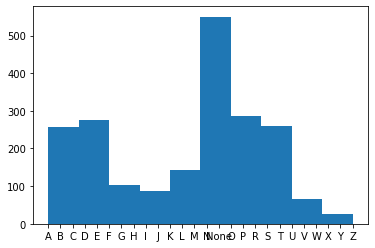

In [59]:
# distribution of  data
sorted_list = cells["targets"].copy()
sorted_list.sort()
n, bins, patches = plt.hist(sorted_list)
plt.show()

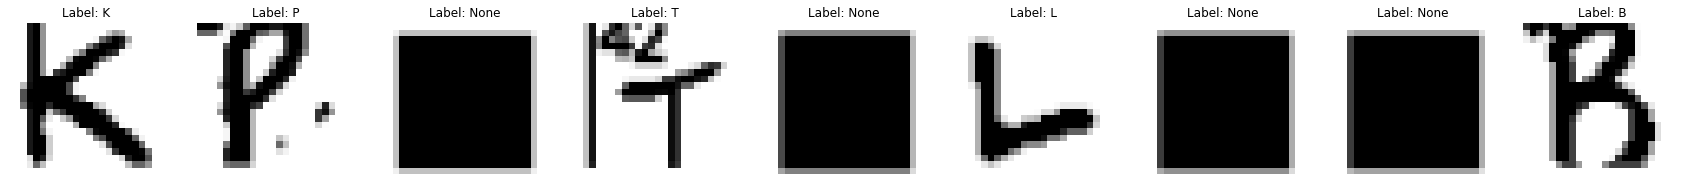

In [61]:
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# flatten the images
n_samples = len(cells['images'])
data = cells['images'].reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma='scale')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data, cells['targets'], test_size=0.7, shuffle=True
)

_, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 8))
for ax, image, prediction in zip(axes, X_train, y_train):
    ax.set_axis_off()
    image = image.reshape(dimension,dimension)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {prediction}")

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

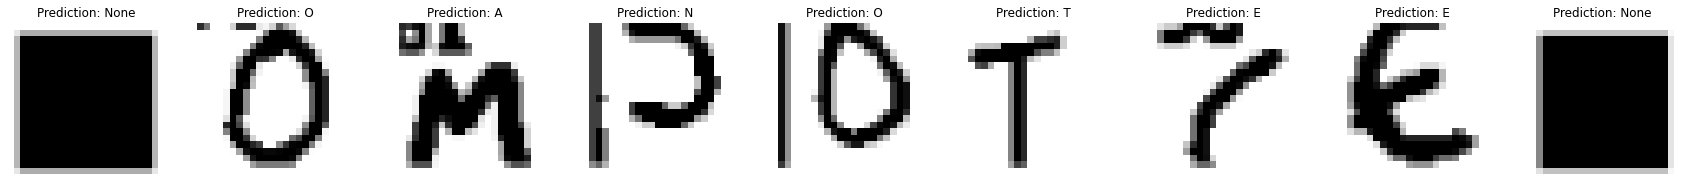

In [62]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 8))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(dimension,dimension)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [63]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           A       0.78      0.93      0.85       133
           B       0.00      0.00      0.00        23
           C       0.00      0.00      0.00        34
           D       0.65      0.32      0.43        41
           E       0.51      0.94      0.66       143
           F       0.00      0.00      0.00         7
           G       1.00      0.14      0.24        22
           H       0.87      0.54      0.67        37
           I       0.75      0.69      0.72        64
           J       0.00      0.00      0.00         1
           K       0.00      0.00      0.00        10
           L       0.73      0.68      0.70        56
           M       1.00      0.30      0.46        30
           N       0.57      0.91      0.70        56
        None       1.00      0.99      1.00       330
           O       0.60      0.78      0.68        94
           P       1.00      0.09    

/home/bert/miniconda3/envs/nyt_print_crossword_checker/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bert/miniconda3/envs/nyt_print_crossword_checker/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bert/miniconda3/envs/nyt_print_crossword_checker/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

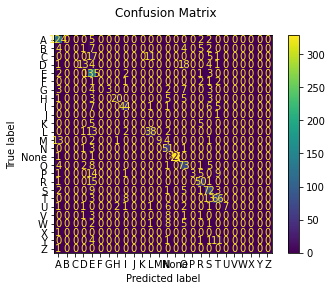

In [64]:

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

In [79]:
# letters with more than 100 points of training data
# frequent_letters = np.array(cells["targets"])
unique,counts = np.unique(cells["targets"], return_counts=True)
frequencies = dict(zip(unique, counts))
print(frequencies)
filtered_frequencies = [key for key,value in frequencies.items() if value > 50]
print(filtered_frequencies)


{'A': 183, 'B': 30, 'C': 43, 'D': 64, 'E': 211, 'F': 17, 'G': 33, 'H': 52, 'I': 86, 'J': 2, 'K': 18, 'L': 82, 'M': 42, 'N': 90, 'None': 460, 'O': 135, 'P': 42, 'R': 110, 'S': 134, 'T': 126, 'U': 32, 'V': 15, 'W': 19, 'X': 4, 'Y': 19, 'Z': 3}
['A', 'D', 'E', 'H', 'I', 'L', 'N', 'None', 'O', 'R', 'S', 'T']


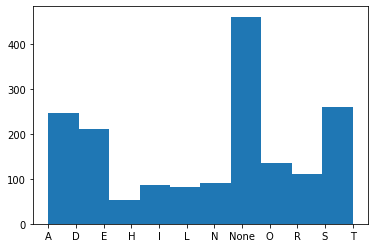

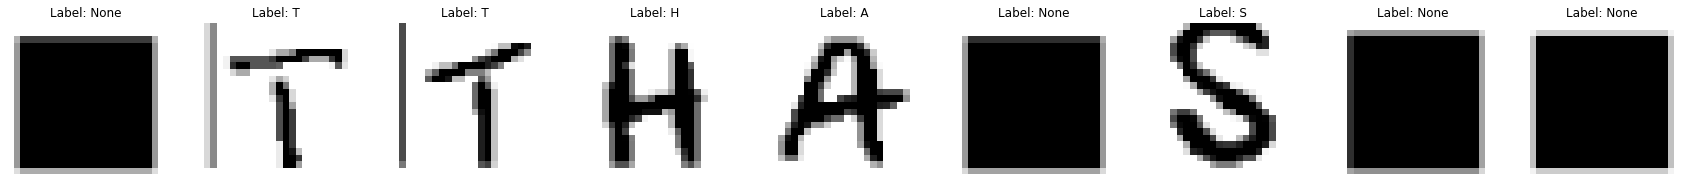

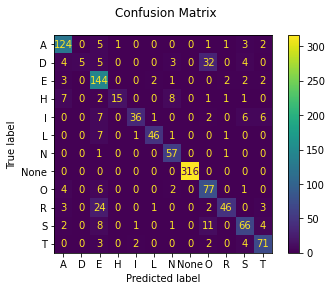

Classification report for classifier SVC():
              precision    recall  f1-score   support

           A       0.84      0.91      0.87       137
           D       1.00      0.09      0.17        53
           E       0.68      0.92      0.78       156
           H       0.94      0.43      0.59        35
           I       0.90      0.62      0.73        58
           L       0.92      0.82      0.87        56
           N       0.78      0.97      0.86        59
        None       1.00      1.00      1.00       316
           O       0.60      0.86      0.71        90
           R       0.88      0.58      0.70        79
           S       0.76      0.71      0.73        93
           T       0.81      0.87      0.84        82

    accuracy                           0.83      1214
   macro avg       0.84      0.73      0.74      1214
weighted avg       0.85      0.83      0.81      1214




In [82]:
# run model only letters that have signifcant number of training data

# image size to use for training
dimension=24

image_input_path = "../data/processed/image_uploads/letters"
cells = load_dataset.load_dataset(image_input_path,dimension=dimension,letters_to_include=filtered_frequencies)

# distribution of  data
sorted_list = cells["targets"].copy()
sorted_list.sort()
n, bins, patches = plt.hist(sorted_list)
plt.show()

# flatten the images
n_samples = len(cells['images'])
data = cells['images'].reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma='scale')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data, cells['targets'], test_size=0.7, shuffle=True
)

_, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 8))
for ax, image, prediction in zip(axes, X_train, y_train):
    ax.set_axis_off()
    image = image.reshape(dimension,dimension)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {prediction}")

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)


Future todos:
- More data
- Different algorithms
- Balance data, more processing